In [1]:
import pandas as pd

dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.35. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset - Time period is Monthly

In [2]:
datapath = '../example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


<AxesSubplot:>

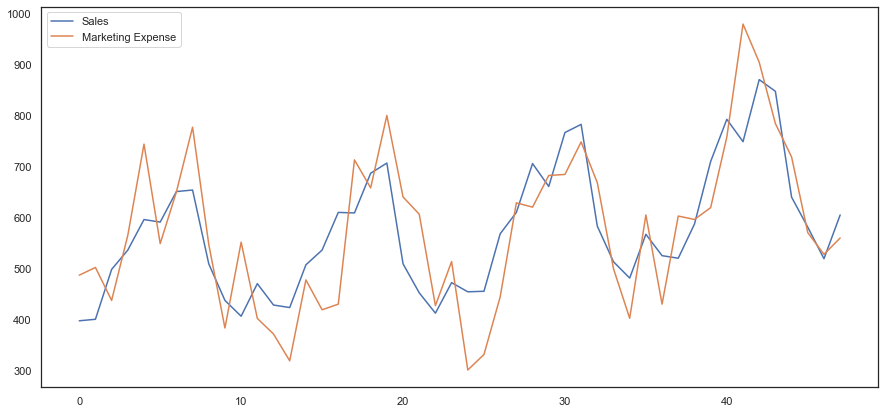

In [3]:
dataset[['Sales', 'Marketing Expense']].plot(figsize=(15,7))

# Train Auto_TS Model but don't provide Time Period as Monthly
We will see if Auto_TS can automatically infer the Time Period as Monthly

In [4]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [5]:
FORECAST_PERIOD = 3

In [6]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [7]:
model = auto_timeseries(
    score_type='rmse',
    model_type='best', verbose=2
)        

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      -3.272157732365595      |
|           p-value           |     0.01616983190458116      |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             43.0             |
|     Critical Value (1%)     |     -3.5925042342183704      |
|     Critical Value (5%)     |      -2.931549768951162      |
|     Critical Value (10%)    |      -2.60406594375338       |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_colu

 Iteration 2 completed
 Iteration 3 completed
 Iteration 4 completed
 Iteration 5 completed
 Iteration 6 completed
 Iteration 7 completed
 Iteration 8 completed
 Iteration 9 completed
 Iteration 10 completed
 Iteration 11 completed
 Iteration 12 completed
 Iteration 13 completed
 Iteration 14 completed
 Iteration 15 completed
 Iteration 16 completed
    Best AR order p = 1, MA order q = 1, Interim metric = 677.839
Best variable selected for VAR: Marketing Expense
    Root Mean Squared Error predictions vs actuals = 160.70
    Std Deviation of actuals = 126.63
    Normalized RMSE = 168%

Fold Number: 2 --> Train Shape: 34 Test Shape: 5

Additional Variable in VAR model = Marketing Expense
 Iteration 1 completed
 Iteration 2 completed
 Iteration 3 completed
 Iteration 4 completed
 Iteration 5 completed
 Iteration 6 completed
 Iteration 7 completed
 Iteration 8 completed
 Iteration 9 completed
 Iteration 10 completed
 Iteration 11 completed
 Iteration 12 completed
 Iteration 13 completed


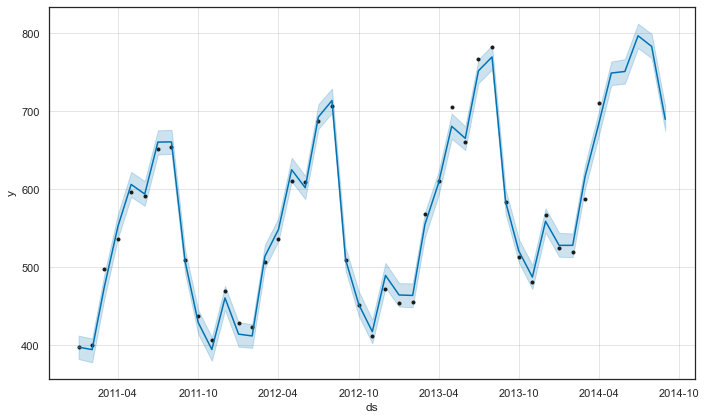

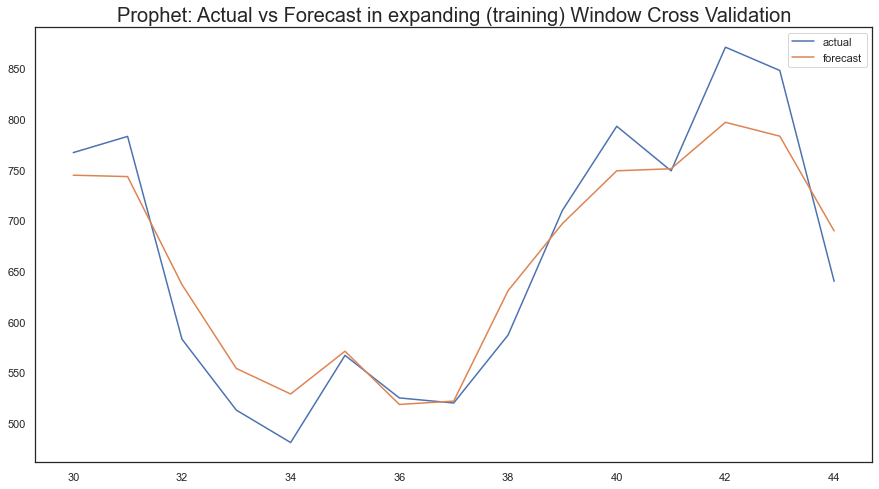

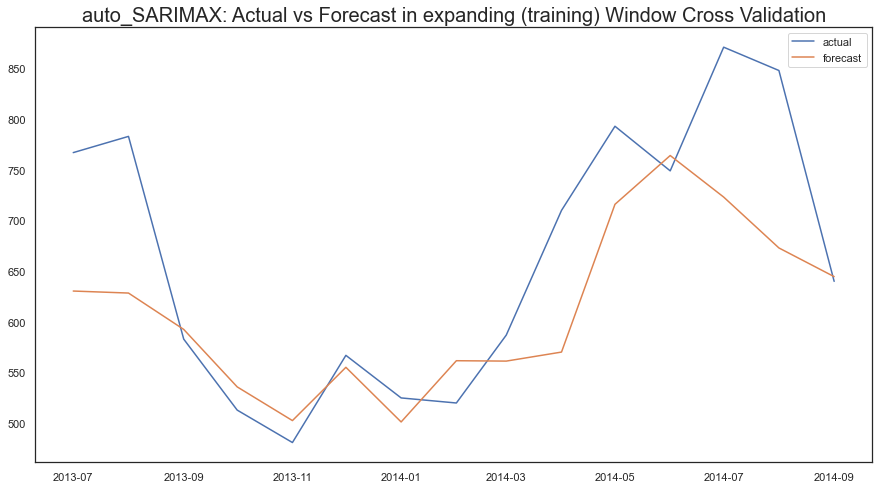

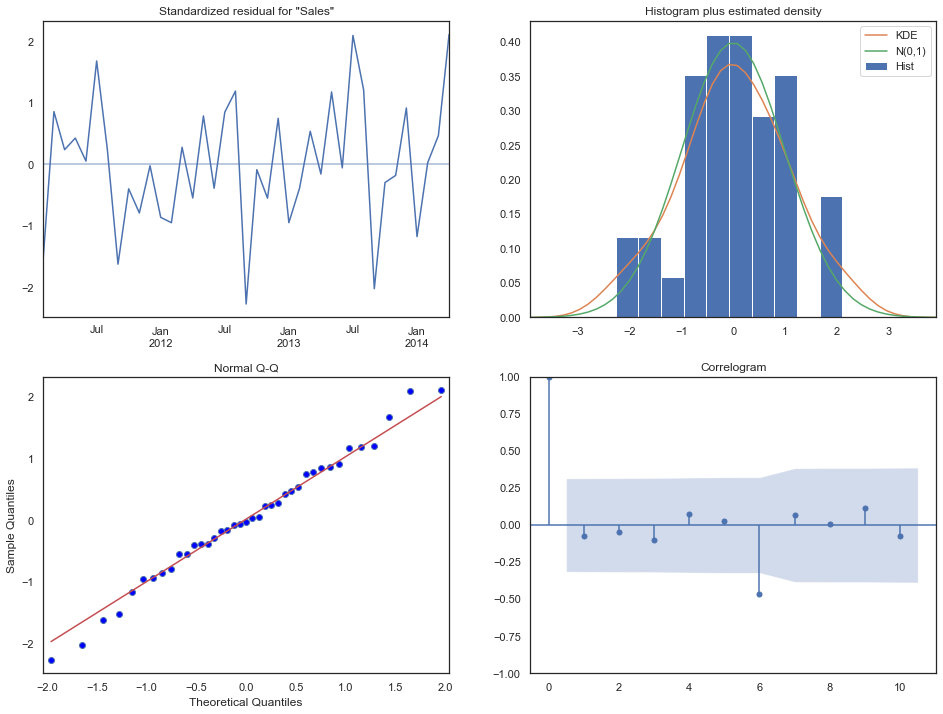

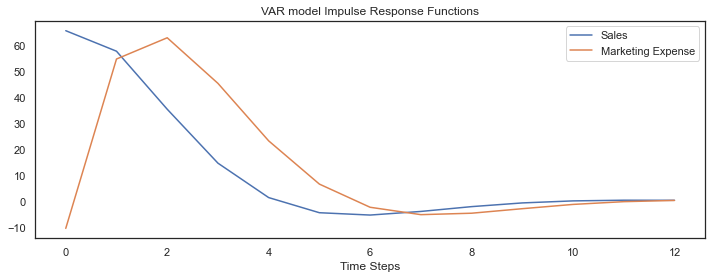

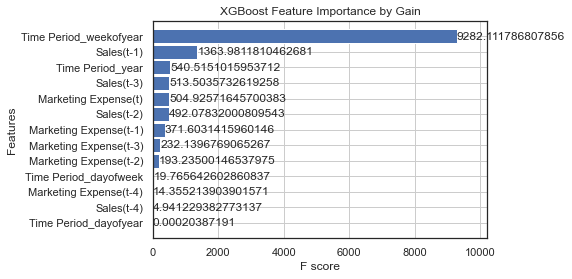

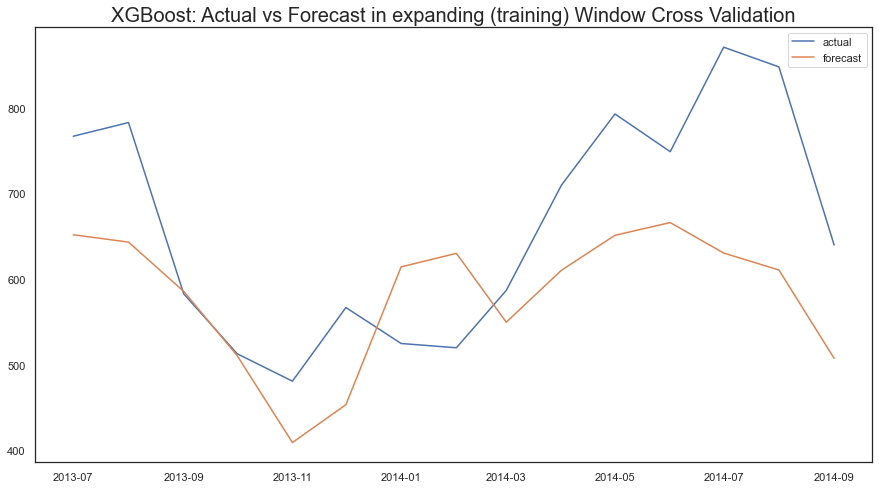

In [8]:
model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [9]:
model.get_leaderboard()

,name,rmse
0,Prophet,38.701333
1,auto_SARIMAX,89.670872
3,ML,119.730761
2,VAR,148.028366


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

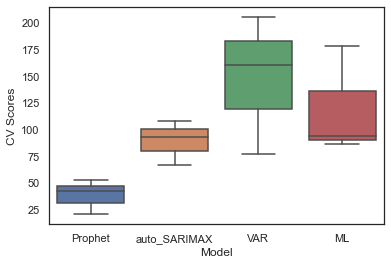

In [10]:
model.plot_cv_scores()

In [11]:
# make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,42.295438
1,Prophet,20.714416
2,Prophet,53.094146
3,auto_SARIMAX,93.396761
4,auto_SARIMAX,67.279404
5,auto_SARIMAX,108.336450
6,VAR,160.696980
7,VAR,77.626105
8,VAR,205.762014
9,ML,87.027026


In [12]:
results_dict = model.get_ml_dict()

In [13]:
results_dict['Prophet']['forecast'] 

array([744.72467531, 743.3519548 , 636.8191262 , 554.07287676,
       528.88406206, 571.09593991, 518.56473237, 521.87459946,
       630.74665325, 696.96305378, 749.06129829, 751.07731594,
       796.89239642, 783.20675308, 689.69824041])

In [14]:
results_dict['auto_SARIMAX']['forecast']

[array([630.44162347, 628.46218101, 592.5830876 , 535.89593398,
        502.64688685]),
 array([555.2071348 , 501.30411631, 561.71203397, 561.33080334,
        570.23869181]),
 array([715.99643114, 764.13079551, 723.13949832, 672.95386958,
        644.64388543])]

In [15]:
results_dict['VAR']['forecast'] 

[array([592.400095  , 513.63346972, 454.4504678 , 427.38279604,
        433.89527778]),
 array([502.87547958, 526.76464307, 543.89780725, 552.43064364,
        554.2827985 ]),
 array([675.89993056, 622.20405881, 578.38290969, 553.06751669,
        543.6129443 ])]

In [16]:
results_dict['ML']['forecast'] # it now provides forecasts

[array([651.9308 , 643.42584, 585.83276, 510.8112 , 409.34924],
       dtype=float32),
 array([453.52548, 614.4614 , 630.268  , 549.9204 , 610.57196],
       dtype=float32),
 array([651.3446 , 666.19336, 630.6322 , 610.7881 , 507.64316],
       dtype=float32)]

# Forecast Results

In [17]:
# Actual Test
test.head()

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [18]:
# Using Best Model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,694.246933,584.671300,620.477853,694.184101,694.309525,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,0.0,0.0,0.0,602.797914
1,2014-11-01,700.677694,553.279745,590.096255,700.367779,700.946240,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,0.0,0.0,0.0,571.531129
2,2014-12-01,706.901011,623.836857,660.263725,706.251844,707.440000,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,0.0,0.0,0.0,642.968190


In [19]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='ML'
)
future_predictions

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,488.862335,NaN,NaN,NaN
2014-11-01,422.914154,NaN,NaN,NaN
2014-12-01,432.040192,NaN,NaN,NaN


In [20]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,694.246933,583.240692,620.301579,694.172281,694.306690,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,0.0,0.0,0.0,602.797914
1,2014-11-01,700.677694,553.100381,588.320394,700.356190,700.940563,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,0.0,0.0,0.0,571.531129
2,2014-12-01,706.901011,624.441122,661.630358,706.244985,707.405631,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,0.0,0.0,0.0,642.968190


In [21]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='auto_SARIMAX'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,614.597700,62.886966,491.341511,737.853888
2014-11-01,613.551709,68.730187,478.843018,748.260400
2014-12-01,633.870155,69.809714,497.045630,770.694679


In [22]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='VAR'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,589.885825,73.666278,445.502573,734.269076
2014-11-01,566.256515,101.215960,367.876878,764.636152
2014-12-01,559.005356,113.950673,335.666140,782.344572
